# Binary Adversarial MNIST

In [13]:
import torch
import pickle
import numpy
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
from train_binary_MNIST_sigmoid_networks import Net_sigmoid
import adversarial_training
import adversaries
from torchvision import datasets, transforms
os.chdir("C:\\Users\\fran316\\OneDrive - PNNL\\Documents\\experiments")

In [14]:
trial_list=[]
for i in range(0,10):
    trial_list.append("'trial"+str(i)+"'")
print(trial_list)

["'trial0'", "'trial1'", "'trial2'", "'trial3'", "'trial4'", "'trial5'", "'trial6'", "'trial7'", "'trial8'", "'trial9'"]


## training error

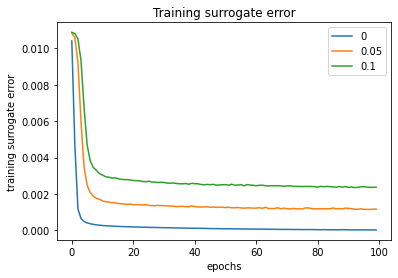

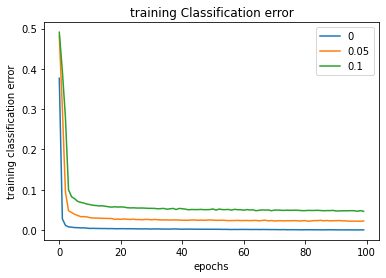

In [15]:

i=0
trial=trial_list[i]

eps_list=[0,.05,.1]


for eps in eps_list:
    hp_name=os.path.join("models_final","binary_sigmoid_models",trial,trial)
    hp_name=hp_name+"_epsilon="+str(eps)+"_hyperparameters.p"
    file =open(hp_name,'rb')
    vars=pickle.load(file)
    y=vars['training_error']
    x=[ i for i in range(len(y))]
    plt.plot(x, y,label=str(eps))

plt.xlabel('epochs')
plt.ylabel('training surrogate error')
plt.title('Training surrogate error')
plt.legend([str(eps) for eps in eps_list])
plt.show()


for eps in eps_list:
    hp_name=os.path.join("models_final","binary_sigmoid_models",trial,trial)
    hp_name=hp_name+"_epsilon="+str(eps)+"_hyperparameters.p"
    file =open(hp_name,'rb')
    vars=pickle.load(file)
    y=vars['classification_error']
    x=[ i for i in range(len(y))]
    plt.plot(x, y)

plt.xlabel('epochs')
plt.ylabel('training classification error')
plt.title('training Classification error')
plt.legend([str(eps) for eps in eps_list])
plt.show()





In [16]:
mnist_train_set= datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),]))
mnist_train_sbset=[]
for (data, label) in mnist_train_set:
    if label==1:
        mnist_train_sbset.append((data,label))
    elif label==7:
        mnist_train_sbset.append((data,0))

0


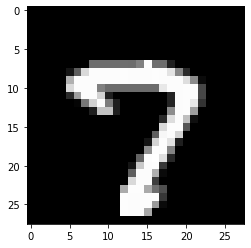

In [17]:
x,label=mnist_train_sbset[11]
print(label)
plt.imshow(x[0],cmap='gray')

## test error

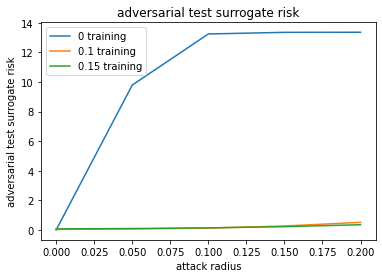

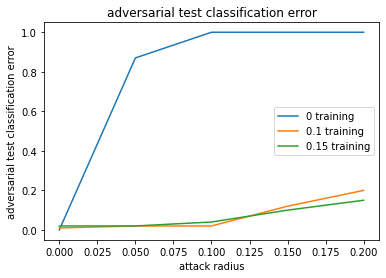

In [18]:
i=0
trial=trial_list[i]
eps_list=[0, .1 ,.15]
eps_eval=[0, 0.05, .1, .15, .2]
#test_loader_start = torch.utils.data.DataLoader(
 #   datasets.MNIST('../pretrained_data', train=False, download=True, transform=transforms.Compose([
 #           transforms.ToTensor(),])),
 #       batch_size=1, shuffle=True) 
test_loader_start= datasets.MNIST('../pretrained_models', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
           ]))
mnist_test_sbset=[]
for (data, label) in test_loader_start:
    if label==1:
        mnist_test_sbset.append((data,label))
    elif label==7:
        mnist_test_sbset.append((data,0))           
sbset=list(range(0,100))
sbset_1=torch.utils.data.Subset(mnist_test_sbset,sbset)
test_loader=torch.utils.data.DataLoader(sbset_1,batch_size=1)
#test_loader=test_loader_start
all_classification_errors=[]
for eps in eps_list:
    names_base=os.path.join("models_final","binary_sigmoid_models",trial,trial)
    names_base=names_base+"_epsilon="+str(eps)
    hp_name=names_base+"_hyperparameters.p"
    model_name=names_base+"model.pt"
    file =open(hp_name,'rb')
    vars=pickle.load(file)

    state_dict=torch.load(model_name,map_location=torch.device('cpu'))
    model=Net_sigmoid()
    model.load_state_dict(state_dict)
    model.eval()
    loss_function=vars['loss_function']
    surrogate_errors=[]
    classification_errors=[]
    
    for e in eps_eval:
        if e==0:
            adversary=adversaries.trivial_attack
        else:
            iter=vars['iterations']
            p=vars['p']
            def adversary(model,x,y):
                return adversaries.pgd_attack_p(x,y,e,model,loss_function,p,iter,rand_init=True)
        surrogate_risk,class_risk=adversarial_training.test(model,test_loader,adversary,loss_function,device='cpu')
        surrogate_errors.append(surrogate_risk)
        classification_errors.append(class_risk)
    plt.plot(eps_eval,surrogate_errors)
    all_classification_errors.append(classification_errors)



plt.xlabel('attack radius')
plt.ylabel('adversarial test surrogate risk')
plt.title('adversarial test surrogate risk')
plt.legend([str(eps)+' training' for eps in eps_list])
plt.show()

for lst in all_classification_errors:
    plt.plot(eps_eval,lst)

plt.xlabel('attack radius')
plt.ylabel('adversarial test classification error')
plt.title('adversarial test classification error')
plt.legend([str(eps)+' training' for eps in eps_list])
plt.show()

In [24]:
print(classification_errors)

[0.02, 0.02, 0.04, 0.1, 0.15]


# Plain MNIST

In [25]:
trial_list=[]
for i in range(0,10):
    trial_list.append("trial"+str(i))
print(trial_list)

['trial0', 'trial1', 'trial2', 'trial3', 'trial4', 'trial5', 'trial6', 'trial7', 'trial8', 'trial9']


## Training Error

In [26]:
from train_full_MNIST_networks import Net_relu

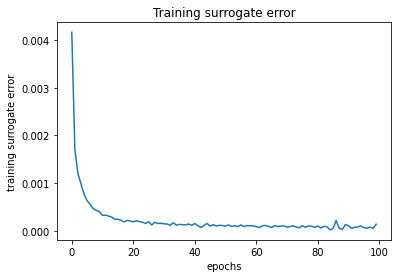

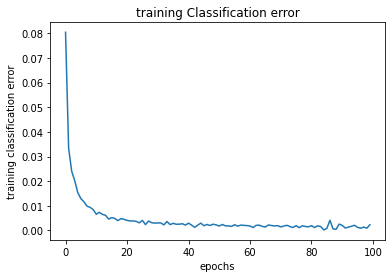

In [27]:
#trial_list=["trial0"]
i=0
trial=trial_list[i]



base_name=os.path.join("models_final","smallest_adversarial_example",trial,trial)
hp_name=base_name+"_hyperparameters.p"
file =open(hp_name,'rb')
vars=pickle.load(file)
y=vars['training_error']
x=[ i for i in range(len(y))]
plt.plot(x, y)

plt.xlabel('epochs')
plt.ylabel('training surrogate error')
plt.title('Training surrogate error')
plt.show()


    
y=vars['classification_error']
x=[ i for i in range(len(y))]
plt.plot(x, y)

plt.xlabel('epochs')
plt.ylabel('training classification error')
plt.title('training Classification error')
plt.show()

In [28]:
optim_name=base_name+"optimizer.pt"
print(optim_name)
optim=torch.load(optim_name)
print(optim)


models_final\smallest_adversarial_example\trial0\trial0optimizer.pt


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

## Test Error

In [ ]:
i=1
trial=trial_list[i]
test_loader_start= datasets.MNIST('../pretrained_models', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
           ]))

#sbset=list(range(0,500))
#sbset_1=torch.utils.data.Subset(test_loader_start,sbset)
#test_loader=torch.utils.data.DataLoader(sbset_1,batch_size=1)
test_loader=torch.utils.data.DataLoader(test_loader_start)
all_classification_errors=[]

names_base=os.path.join("models_final","smallest_adversarial_example",trial,trial)

hp_name=names_base+"_hyperparameters.p"
model_name=names_base+"model.pt"
file =open(hp_name,'rb')
vars=pickle.load(file)

state_dict=torch.load(model_name,map_location=torch.device('cpu'))
model=Net_relu()
model.load_state_dict(state_dict)
model.eval()
loss_function=vars['loss_function']

    

adversary=adversaries.trivial_attack
       
surrogate_risk,class_risk=adversarial_training.test(model,test_loader,adversary,loss_function,device='cpu')




print(surrogate_risk)
print(class_risk)

0.12474708238916192
0.0191


#### The pretrained model:

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
pretrained_model = "pretrained_models/lenet_mnist_model.pth"

# Initialize the network
model = Net().to('cpu')

# Load the pretrained model
model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))

# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()


adversary=adversaries.trivial_attack
       
surrogate_risk,class_risk=adversarial_training.test(model,test_loader,adversary,loss_function,device='cpu')




print(surrogate_risk)
print(class_risk)


0.24424569504335522
0.01
